In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
data = '../input/supermarket-sales/supermarket_sales - Sheet1.csv'

df = pd.read_csv(data)

In [4]:
df.shape

(1000, 17)

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
col_names = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']
for col in col_names:
    print(df[col].value_counts())  

A    340
B    332
C    328
Name: Branch, dtype: int64
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
Member    501
Normal    499
Name: Customer type, dtype: int64
Female    501
Male      499
Name: Gender, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
83.77    3
39.62    2
24.74    2
19.15    2
73.47    2
        ..
57.95    1
47.65    1
42.82    1
48.09    1
88.34    1
Name: Unit price, Length: 943, dtype: int64
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64
10.3260    2
4.4640     2
4.1540     2
9.0045     2
22.4280    2
          ..
7.2135     1
19.5895    1
26.9150    1
24.2575    1
30.9190    1
Name: Tax 5%, Length: 990, dtype: int64
216.8460    2
93.7440     2
87.2340     2
189.0945    2
470.988

In [8]:
print(df['Customer type'].value_counts()) 

Member    501
Normal    499
Name: Customer type, dtype: int64


In [9]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
X = df.drop(['Customer type'], axis=1)

y = df['Customer type']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [13]:
X_train.shape, X_test.shape

((670, 16), (330, 16))

In [14]:
X_train.dtypes

Invoice ID                  object
Branch                      object
City                        object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [15]:
X_train.head()

,Invoice ID,Branch,City,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
703,729-06-2010,B,Mandalay,Male,Health and beauty,80.47,9,36.2115,760.4415,1/6/2019,11:18,Cash,724.23,4.761905,36.2115,9.2
311,181-94-6432,C,Naypyitaw,Male,Fashion accessories,69.33,2,6.9330,145.5930,2/5/2019,19:05,Ewallet,138.66,4.761905,6.9330,9.7
722,776-68-1096,B,Mandalay,Male,Home and lifestyle,44.12,3,6.6180,138.9780,3/18/2019,13:45,Credit card,132.36,4.761905,6.6180,7.9
629,308-39-1707,A,Yangon,Female,Fashion accessories,12.09,1,0.6045,12.6945,1/26/2019,18:19,Credit card,12.09,4.761905,0.6045,8.2
0,750-67-8428,A,Yangon,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1


In [17]:
import category_encoders as ce

In [18]:
encoder = ce.OrdinalEncoder(cols=[ 'Invoice ID', 'Branch', 'City', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,Invoice ID,Branch,City,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
703,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
311,2,2,2,1,2,2,2,2,2,2,2,2,2,1,2,2
722,3,1,1,1,3,3,3,3,3,3,3,3,3,1,3,3
629,4,3,3,2,2,4,4,4,4,4,4,3,4,1,4,4
0,5,3,3,2,1,5,5,5,5,5,5,2,5,1,5,5


In [20]:
X_test.head()

,Invoice ID,Branch,City,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
521,-1.0,2,2,2,3,-1.0,9,-1.0,-1.0,62,132.0,1,-1.0,1,-1.0,6
737,-1.0,2,2,1,5,-1.0,7,-1.0,-1.0,52,-1.0,2,-1.0,1,-1.0,51
740,-1.0,2,2,1,3,-1.0,5,-1.0,-1.0,63,-1.0,1,-1.0,1,-1.0,29
660,-1.0,1,1,2,6,-1.0,3,-1.0,-1.0,43,-1.0,1,-1.0,1,-1.0,53
411,-1.0,1,1,1,6,-1.0,2,-1.0,-1.0,29,237.0,2,-1.0,1,-1.0,39


In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [24]:
y_pred_gini = clf_gini.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4424


In [23]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Member', 'Member', 'Normal', 'Normal', 'Member', 'Member',
       'Member', 'Normal', 'Member', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Member', 'Normal', 'Member', 'Normal', 'Normal', 'Normal',
       'Normal', 'Member', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Memb

In [24]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.5955


In [25]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.5955
Test set score: 0.4424


[Text(0.5089285714285714, 0.9, 'X[7] <= 579.5\ngini = 0.5\nsamples = 670\nvalue = [334, 336]'),
 Text(0.2857142857142857, 0.7, 'X[5] <= 38.5\ngini = 0.5\nsamples = 583\nvalue = [300, 283]'),
 Text(0.14285714285714285, 0.5, 'X[10] <= 9.5\ngini = 0.444\nsamples = 39\nvalue = [13, 26]'),
 Text(0.07142857142857142, 0.3, 'X[11] <= 2.5\ngini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.21428571428571427, 0.3, 'X[4] <= 5.5\ngini = 0.337\nsamples = 28\nvalue = [6, 22]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.302\nsamples = 27\nvalue = [5, 22]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.42857142857142855, 0.5, 'X[10] <= 138.5\ngini = 0.498\nsamples = 544\nvalue = [287, 257]'),
 Text(0.35714285714285715, 0.3, 'X[14] <= 404.5\ngini = 0.483\nsamples = 218\nvalue = [129, 89]'),
 Text(0.32142857142857145, 0.1, 'g

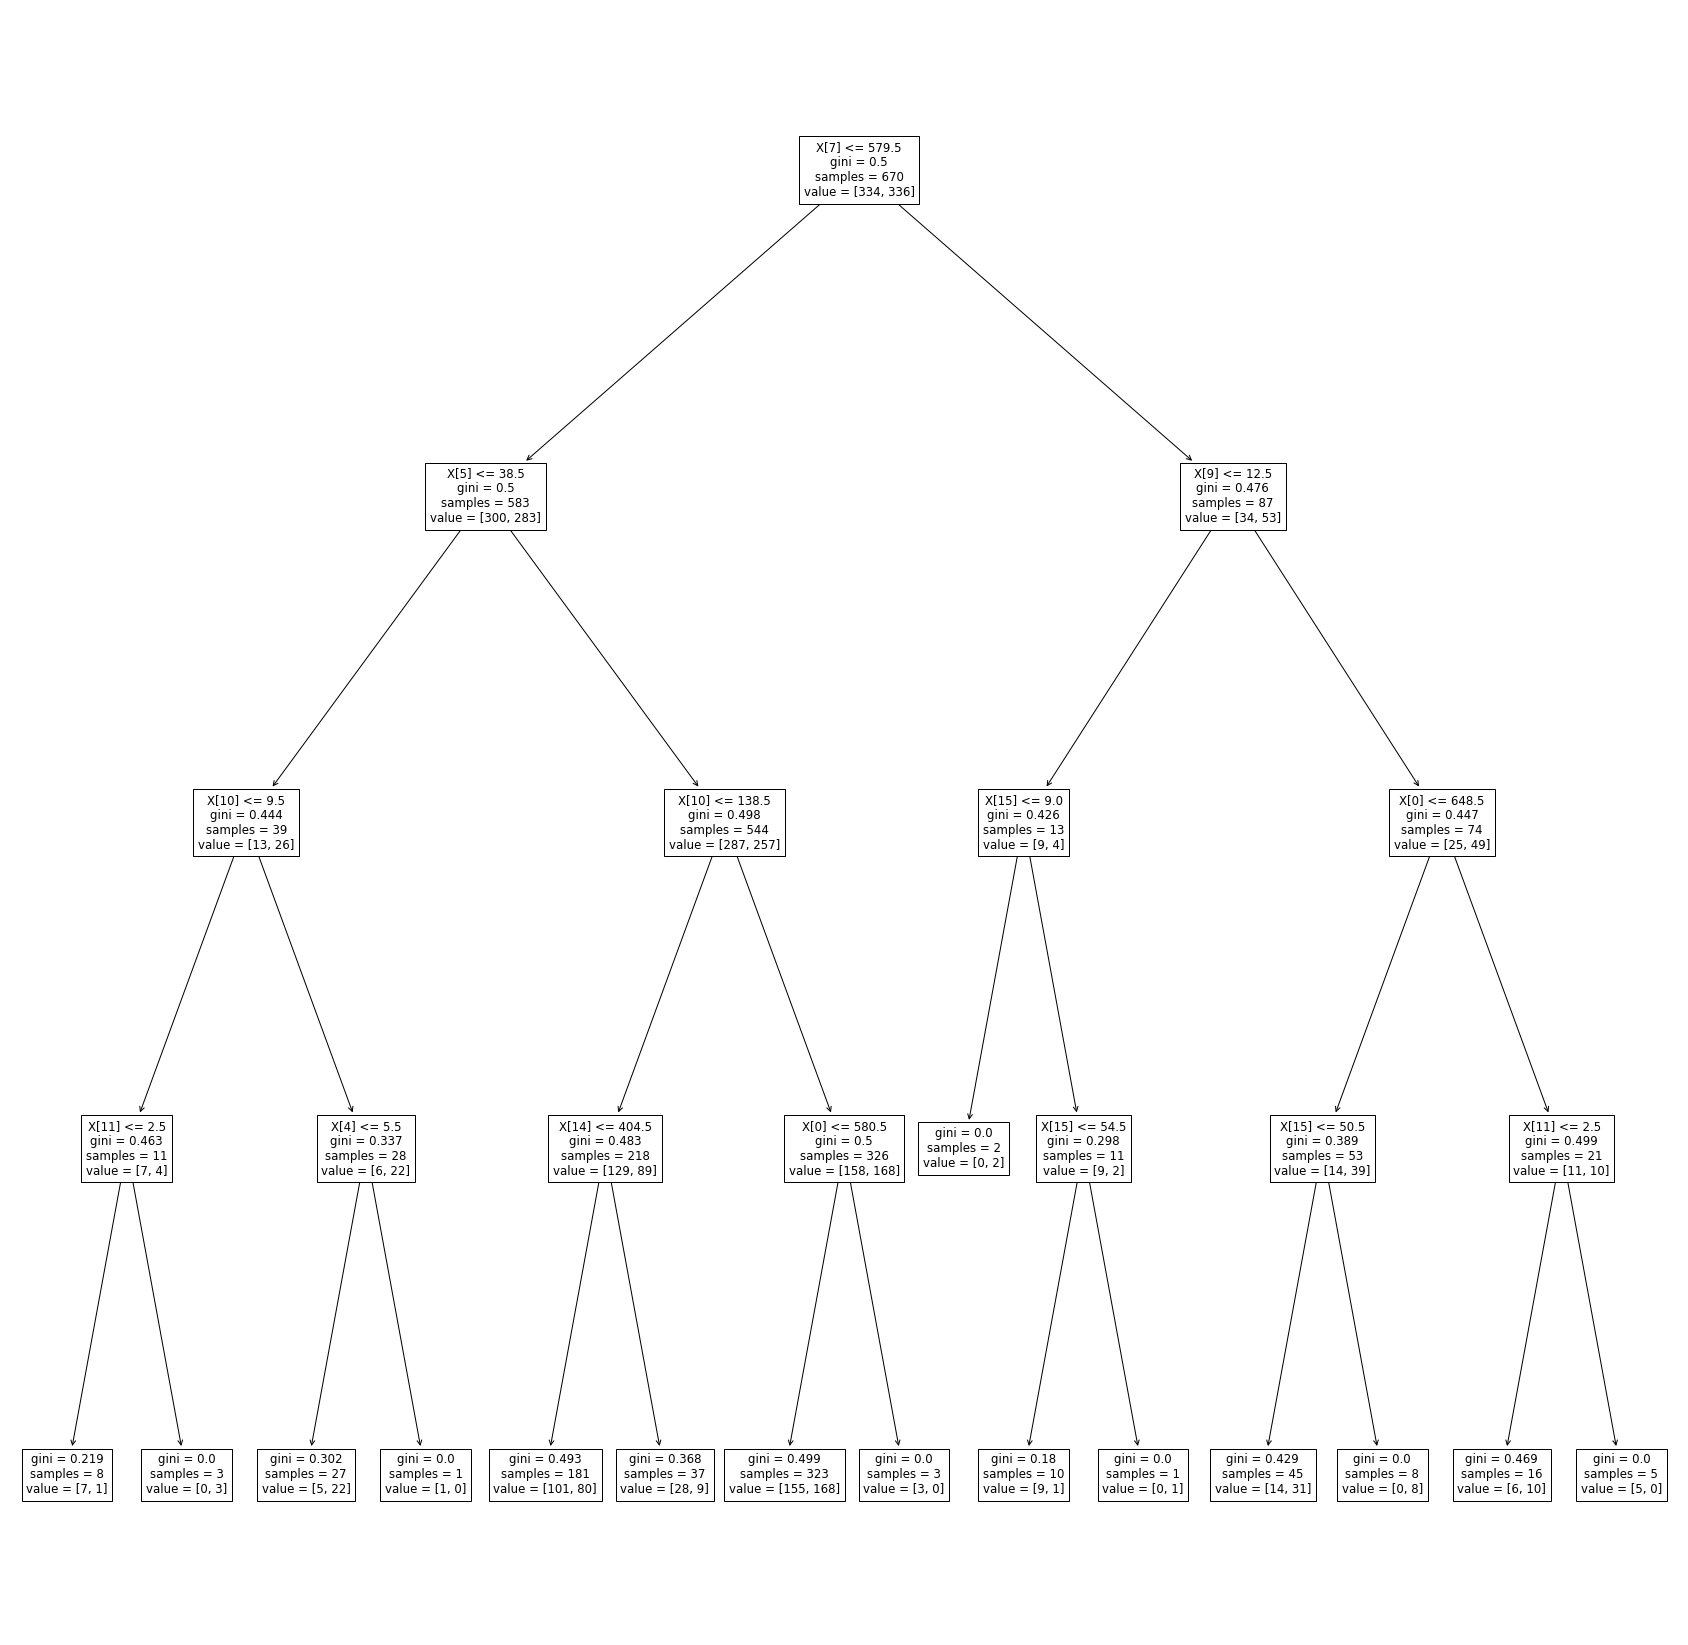

In [26]:
plt.figure(figsize=(30,30))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

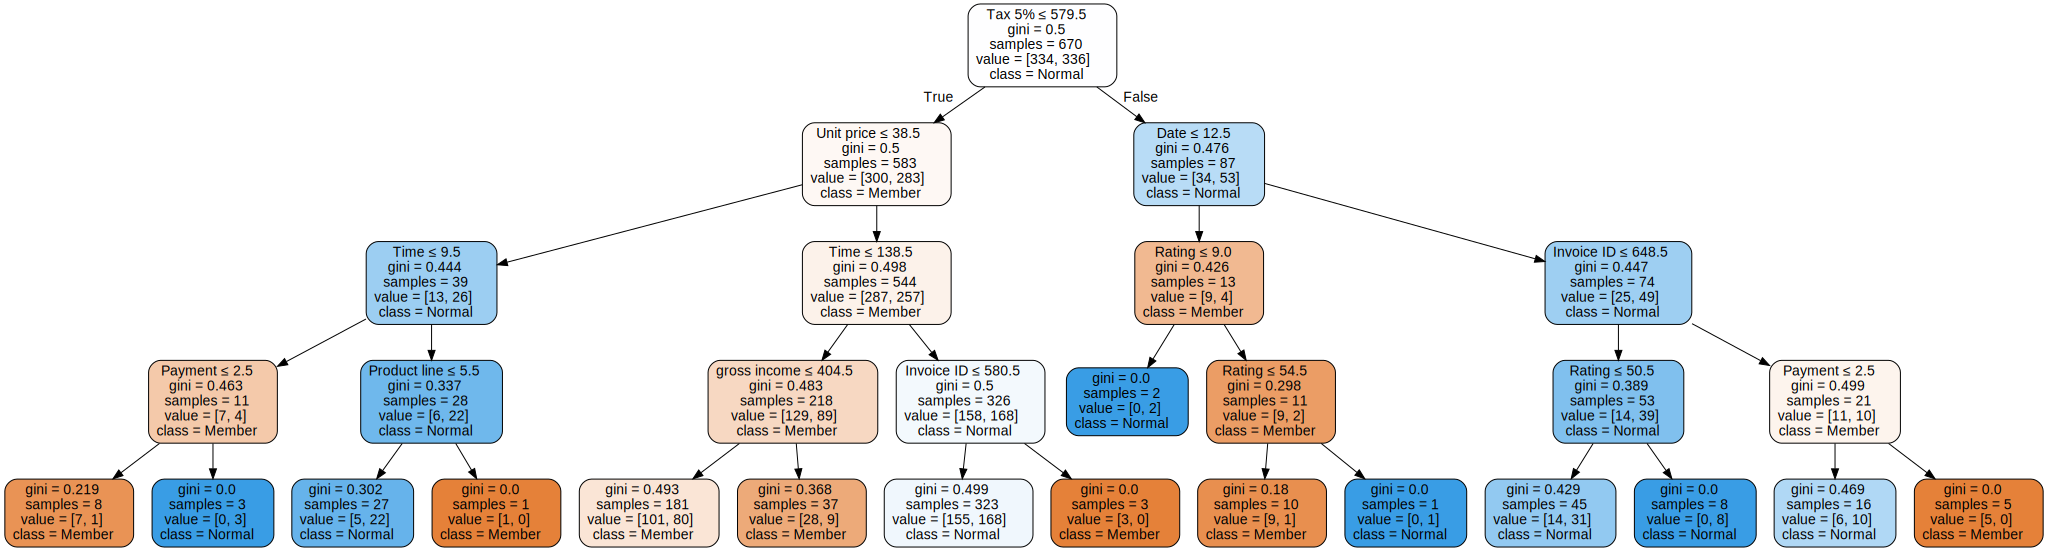

In [27]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [28]:

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [29]:
y_pred_en = clf_en.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.4727


In [31]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['Member', 'Normal', 'Normal', 'Normal', 'Normal', 'Member',
       'Normal', 'Normal', 'Member', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Member', 'Normal', 'Member', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Memb

In [32]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.5955


In [33]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.5955
Test set score: 0.4727


[Text(0.5416666666666666, 0.9166666666666666, 'X[7] <= 579.5\nentropy = 1.0\nsamples = 670\nvalue = [334, 336]'),
 Text(0.3, 0.75, 'X[5] <= 38.5\nentropy = 0.999\nsamples = 583\nvalue = [300, 283]'),
 Text(0.16666666666666666, 0.5833333333333334, 'X[0] <= 31.5\nentropy = 0.918\nsamples = 39\nvalue = [13, 26]'),
 Text(0.13333333333333333, 0.4166666666666667, 'X[11] <= 1.5\nentropy = 0.981\nsamples = 31\nvalue = [13, 18]'),
 Text(0.06666666666666667, 0.25, 'X[10] <= 11.0\nentropy = 0.918\nsamples = 12\nvalue = [8, 4]'),
 Text(0.03333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.1, 0.08333333333333333, 'entropy = 0.985\nsamples = 7\nvalue = [3, 4]'),
 Text(0.2, 0.25, 'X[4] <= 4.5\nentropy = 0.831\nsamples = 19\nvalue = [5, 14]'),
 Text(0.16666666666666666, 0.08333333333333333, 'entropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.23333333333333334, 0.08333333333333333, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.2, 0.41666666666666

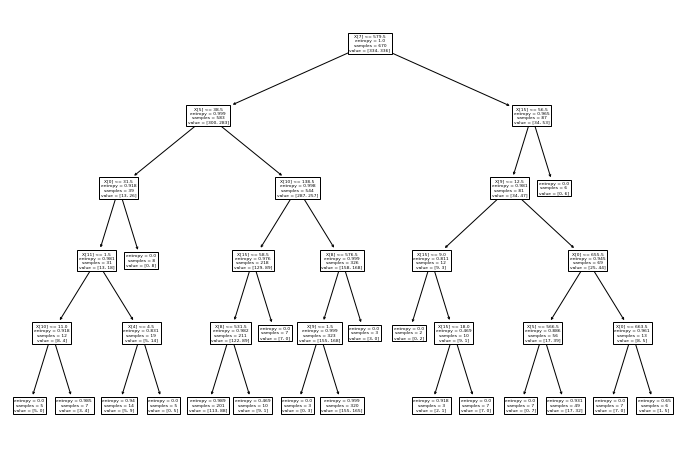

In [34]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [35]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[ 22 145]
 [ 29 134]]


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

      Member       0.43      0.13      0.20       167
      Normal       0.48      0.82      0.61       163

    accuracy                           0.47       330
   macro avg       0.46      0.48      0.40       330
weighted avg       0.46      0.47      0.40       330



In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=44)

In [27]:
predictions = rf_model.predict(X_test)
predictions

array(['Normal', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Normal', 'Normal', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Normal',
       'Normal', 'Normal', 'Member', 'Member', 'Normal', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Normal', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Normal',
       'Normal', 'Member', 'Normal', 'Member', 'Normal', 'Member',
       'Normal', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Normal', 'Normal', 'Normal', 'Normal',
       'Member', 'Normal', 'Member', 'Member', 'Member', 'Member',
       'Member', 'Member', 'Member', 'Member', 'Member', 'Member',
       'Normal', 'Member', 'Member', 'Normal', 'Normal', 'Normal',
       'Normal', 'Member', 'Member', 'Member', 'Member', 'Normal',
       'Normal', 'Member', 'Member', 'Member', 'Member', 'Normal',
       'Normal', 'Member', 'Member', 'Member', 'Member', 'Norm

In [28]:
rf_model.predict_proba(X_test)

array([[0.38, 0.62],
       [0.62, 0.38],
       [0.62, 0.38],
       [0.62, 0.38],
       [0.5 , 0.5 ],
       [0.56, 0.44],
       [0.68, 0.32],
       [0.6 , 0.4 ],
       [0.66, 0.34],
       [0.48, 0.52],
       [0.44, 0.56],
       [0.62, 0.38],
       [0.5 , 0.5 ],
       [0.6 , 0.4 ],
       [0.58, 0.42],
       [0.6 , 0.4 ],
       [0.5 , 0.5 ],
       [0.46, 0.54],
       [0.44, 0.56],
       [0.46, 0.54],
       [0.56, 0.44],
       [0.68, 0.32],
       [0.46, 0.54],
       [0.52, 0.48],
       [0.68, 0.32],
       [0.6 , 0.4 ],
       [0.58, 0.42],
       [0.54, 0.46],
       [0.34, 0.66],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.62, 0.38],
       [0.58, 0.42],
       [0.54, 0.46],
       [0.54, 0.46],
       [0.48, 0.52],
       [0.46, 0.54],
       [0.6 , 0.4 ],
       [0.44, 0.56],
       [0.5 , 0.5 ],
       [0.44, 0.56],
       [0.54, 0.46],
       [0.44, 0.56],
       [0.58, 0.42],
       [0.66, 0.34],
       [0.64, 0.36],
       [0.64, 0.36],
       [0.52,

In [29]:
rf_model.classes_

array(['Member', 'Normal'], dtype=object)

In [31]:
share = rf_model.feature_importances_
cols = X.columns
i = 0
while(i < len(cols)):
    print(f"A share of feature '{cols[i]}' is {round(share[i] * 100, 2)}%")
    i = i + 1

A share of feature 'Invoice ID' is 6.61%
A share of feature 'Branch' is 2.45%
A share of feature 'City' is 2.49%
A share of feature 'Gender' is 2.08%
A share of feature 'Product line' is 5.43%
A share of feature 'Unit price' is 7.76%
A share of feature 'Quantity' is 7.09%
A share of feature 'Tax 5%' is 7.69%
A share of feature 'Total' is 7.56%
A share of feature 'Date' is 10.61%
A share of feature 'Time' is 11.28%
A share of feature 'Payment' is 3.85%
A share of feature 'cogs' is 6.92%
A share of feature 'gross margin percentage' is 0.0%
A share of feature 'gross income' is 7.12%
A share of feature 'Rating' is 11.07%
